1. Importing the Dependencies

In [1]:
#Importing the dependencies
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=100
pd.options.display.max_rows=100


In [2]:
df = pd.read_csv('/content/Airline_customer_satisfaction.csv')

<ipython-input-2-9909d6066be0>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Airline_customer_satisfaction.csv')


2. Data Exploration (Initial EDA and data cleaning)

In [3]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2.0,3.0,3.0,0.0,3.0,5.0,3.0,2.0,0.0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2.0,3.0,4.0,4.0,4.0,2.0,3.0,2.0,310.0,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2.0,2.0,3.0,3.0,4.0,4.0,4.0,2.0,0.0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3.0,1.0,1.0,0.0,1.0,4.0,1.0,3.0,0.0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4.0,2.0,2.0,0.0,2.0,4.0,2.0,5.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39635 entries, 0 to 39634
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       39635 non-null  object 
 1   Customer Type                      39635 non-null  object 
 2   Age                                39635 non-null  object 
 3   Type of Travel                     39635 non-null  object 
 4   Class                              39635 non-null  object 
 5   Flight Distance                    39635 non-null  int64  
 6   Seat comfort                       39635 non-null  int64  
 7   Departure/Arrival time convenient  39635 non-null  int64  
 8   Food and drink                     39635 non-null  int64  
 9   Gate location                      39635 non-null  int64  
 10  Inflight wifi service              39635 non-null  int64  
 11  Inflight entertainment             39635 non-null  int

In [6]:
df.shape

(39635, 22)

Checking the number of satisfied customers in the dataset

In [7]:
value_counts = df['satisfaction'].value_counts(dropna=False)
value_counts

satisfaction
satisfied       20688
dissatisfied    18946
mer                 1
Name: count, dtype: int64

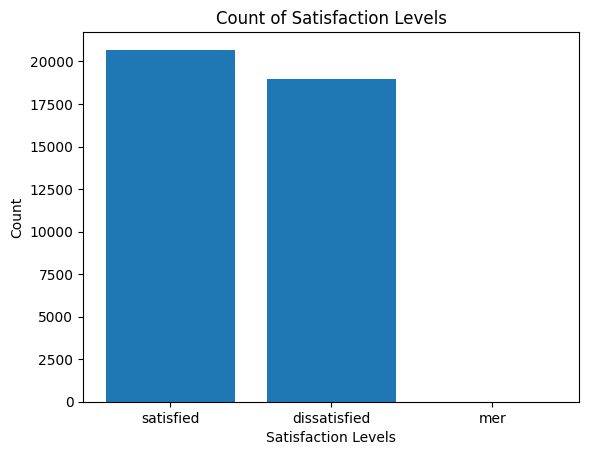

In [8]:
# Plotting the counts
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Satisfaction Levels')
plt.ylabel('Count')
plt.title('Count of Satisfaction Levels')
plt.show()

Checking missing values

In [9]:
df.isna().sum().sort_values(ascending=False)

Arrival Delay in Minutes             143
Departure Delay in Minutes             2
Online boarding                        2
Cleanliness                            2
Checkin service                        1
Baggage handling                       1
Leg room service                       1
On-board service                       1
Ease of Online booking                 1
Online support                         1
Customer Type                          0
satisfaction                           0
Inflight wifi service                  0
Gate location                          0
Food and drink                         0
Departure/Arrival time convenient      0
Seat comfort                           0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
Inflight entertainment                 0
dtype: int64

Preparing the data

In [10]:
#Dropping missing values
df1 = df.dropna(axis=0).reset_index(drop = True)

In [11]:
df1['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df1[['satisfaction']]).toarray()

In [12]:
df1 = df1.astype({"Inflight entertainment": float})

In [13]:
df1.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4.0,2.0,3.0,3.0,0.0,3.0,5.0,3.0,2.0,0.0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2.0,2.0,3.0,4.0,4.0,4.0,2.0,3.0,2.0,310.0,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0.0,2.0,2.0,3.0,3.0,4.0,4.0,4.0,2.0,0.0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4.0,3.0,1.0,1.0,0.0,1.0,4.0,1.0,3.0,0.0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3.0,4.0,2.0,2.0,0.0,2.0,4.0,2.0,5.0,0.0,0.0


Creating the training and testing data

In [14]:
X = df1[["Inflight entertainment"]]
y = df1["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

3. Model building

In [15]:
#Fitting a LogisticRegression model to the data
clf = LogisticRegression().fit(X_train,y_train)

Obtain parameter estimates

In [16]:
clf.coef_

array([[0.92356486]])

In [17]:
clf.intercept_

array([-2.93384578])

Creating a plot of our model

<Axes: xlabel='Inflight entertainment', ylabel='satisfaction'>

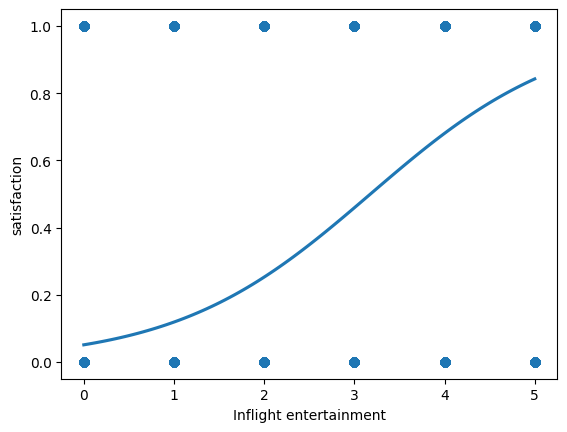

In [18]:
sns.regplot(x="Inflight entertainment", y="satisfaction", data=df1, logistic=True, ci=None)

The graph seems to indicate that the higher the inflight entertainment value, the higher the customer satisfaction, though this is currently not the most informative plot. The graph currently doesn't provide much insight into the data points, as Inflight entertainment is categorical.

4. Results and evaluation

In [19]:
#Predicting the outcome for the test dataset
# Saving predictions.
y_pred = clf.predict(X_test)

In [20]:
#Printing out y_pred
print(y_pred)

[1. 0. 1. ... 1. 0. 1.]


In [21]:
#Using the `predict_proba` and `predict` functions on `X_test
clf.predict_proba(X_test)

array([[0.15656937, 0.84343063],
       [0.74776283, 0.25223717],
       [0.15656937, 0.84343063],
       ...,
       [0.15656937, 0.84343063],
       [0.74776283, 0.25223717],
       [0.31855646, 0.68144354]])

In [22]:
#Analyse the results
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.814399
Precision: 0.832829
Recall: 0.804577
F1 Score: 0.818460


Producing a confusion matrix

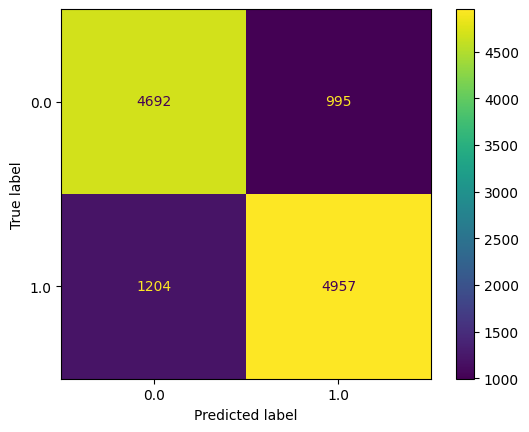

In [23]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()
plt.show()


Considerations

False positives and False negative values relatively low under 1500.

The true positives and true negatives —are both high numbers above 4500.

There isn't a large difference in the number of false positives and false negatives.

Logistic regression accurately predicted satisfaction 80.2 percent of the time

The model is 80.2 percent accurate. This is an improvement over the dataset's customer satisfaction rate of 54.7 percent.

The success of the model suggests that the airline should invest more in model developement to examine if adding more independent variables leads to better results.

